# Simple Linear Regression
#### Simple Linear Regression means x has only one value.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the dataset

In [2]:
data = pd.read_csv('sat_gpa.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
95,1934,3.54
96,1861,3.58
97,1931,3.58
98,1933,3.59


## Split X, y

In [3]:
X = data[['SAT']]
y = data['GPA']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 1)
(80,)
(20, 1)
(20,)


## Visualize train dataset

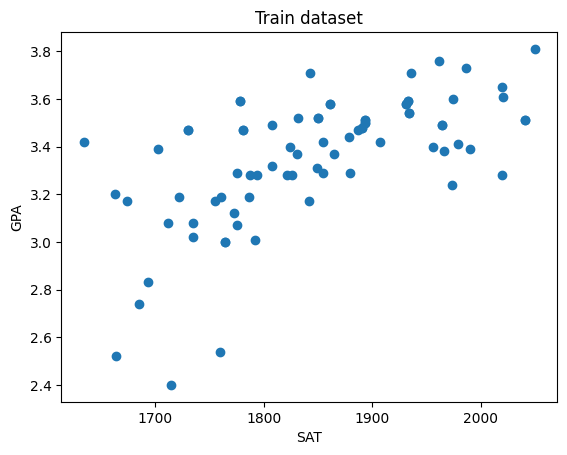

In [5]:
plt.scatter(x_train, y_train)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Train dataset')
plt.show()

## Normalize x

In [6]:
x_scaler = StandardScaler()

x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

## Train the model

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)

line = 'GPA = %.3f + %.3f*SAT' %(model.intercept_, model.coef_[0])

print('Weight of model: ', model.coef_.item())
print('Bias of model: ', model.intercept_.item())

Weight of model:  0.16922521858414835
Bias of model:  3.3545000000000003


## Plot model

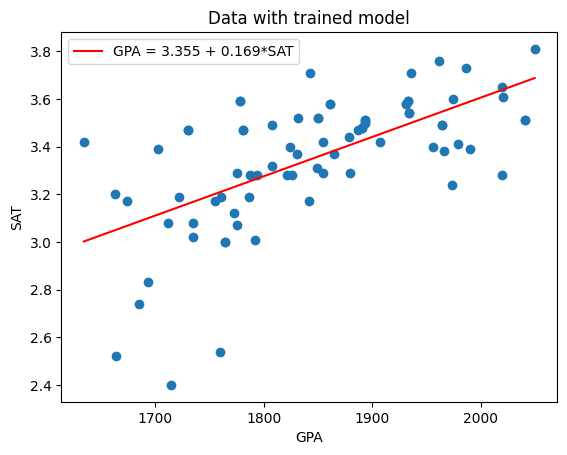

In [8]:
x_line = np.linspace(min(x_train), max(x_train))
y_line = model.predict(x_line)

plt.plot(x_scaler.inverse_transform(x_line), y_line, color='red', label=line)
plt.scatter(x_scaler.inverse_transform(x_train), y_train)
plt.title('Data with trained model')
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.legend()
plt.show()

## Evaluate model performance

In [9]:
y_pred = model.predict(x_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R²:', r2_score(y_test, y_pred))
print('')
print('Train loss:', mean_squared_error(y_train, model.predict(x_train)))
print('Test loss:', mean_squared_error(y_test, model.predict(x_test)))

MAE: 0.13964093759999746
RMSE: 0.174522019874601
R²: 0.22370002558674085

Train loss: 0.0442875753951472
Test loss: 0.03045793542111063
